In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os
import pickle

from src.train import train_nn_agent
from src.eval import monitor, plot_learned_rewards

### Train agent with best config

In [5]:
df_scores  = pd.read_excel("artifacts/scores/scores.xlsx", index_col=0)
best_config = df_scores.iloc[0].to_dict()
for int_param in ['BATCH_SIZE', 'PATIENCE_MAX', 'REPLAY_BUFFER_LEN', 'TRAIN_GAMES', 'VAL_SET_SIZE']:
    best_config[int_param] = int(best_config[int_param])

best_agent, stats = train_nn_agent(best_config)

Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.30
Net evaluated, win ratio = 0.40
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.60
Net evaluated, win ratio = 0.60
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.80
Net is better than cur best, sync on iter 110
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.40
Net evaluated, win ratio = 0.40
Net evaluated, win ratio = 0.60
Net evaluated, win ratio = 0.30
Net evaluated, win ratio = 0.80
Net is better than cur best, sync on iter 180
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.70
Net is better than cur best, sync on iter 200
Net evaluated, win ratio = 0.60
Net evaluated, win ratio = 0.60
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.50
Net evaluated, win ratio = 0.70
Net is better than cur best, sync on iter 250
Net evaluated, w

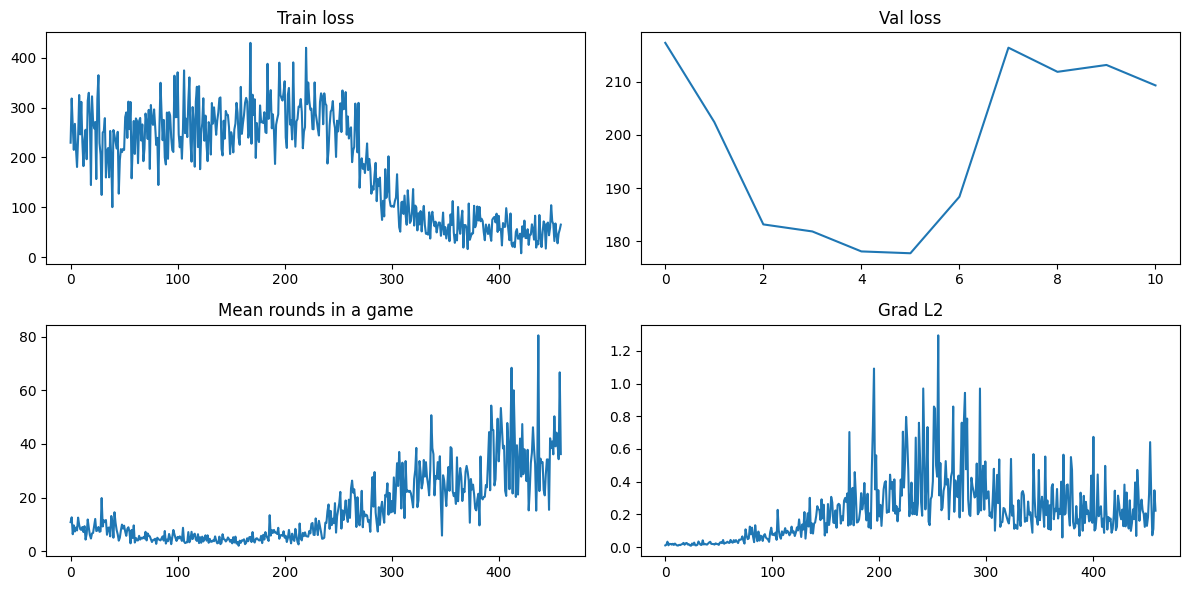

In [17]:
monitor(**stats)

In [ ]:
"""Optionally save the best agent"""


# agent_filename = os.path.join(r"artifacts\best_agent", "agent.pkl")
# with open(agent_filename, 'wb') as agent_file:
#     pickle.dump(best_agent, agent_file)

Training process with the best configuration is quiet unstable. In practise I can say, that one can deem the model converged, if train loss resembles the one on the figure above, with a big drop at around 250th iteration.

### Agent's strategy analysis

To understand why the reasnong behind agent's actions we can plot the predicted rewards against the environment state. Red colour stands **fold**, green is for **push**, values correspond to rewards.

Agent's behaviour is mostly aligned with our intuition on how to play the game:
1) When agent plays as **SB**, its actions are more aggressive. It can play **push** with lower ranked cards compared to **BB** (from **SB** position it plays **push** starting from card rank 8; as **BB** - from rank 10). One can say, that even in the scop of a single round **SB** tends to bluff.
2) Having the highest ranked card, agent correclty assumes, that maximum reward is achieved when both **SB**'s and **BB**'s stackes are maximal.
3) In the same way, having the lowest ranked cards, agent coorectly assumes, that damage is minimized, when both parties have minimal stackes.
4) When stackes are not too high, agent can risk and play **push** even with not-too-good cards.

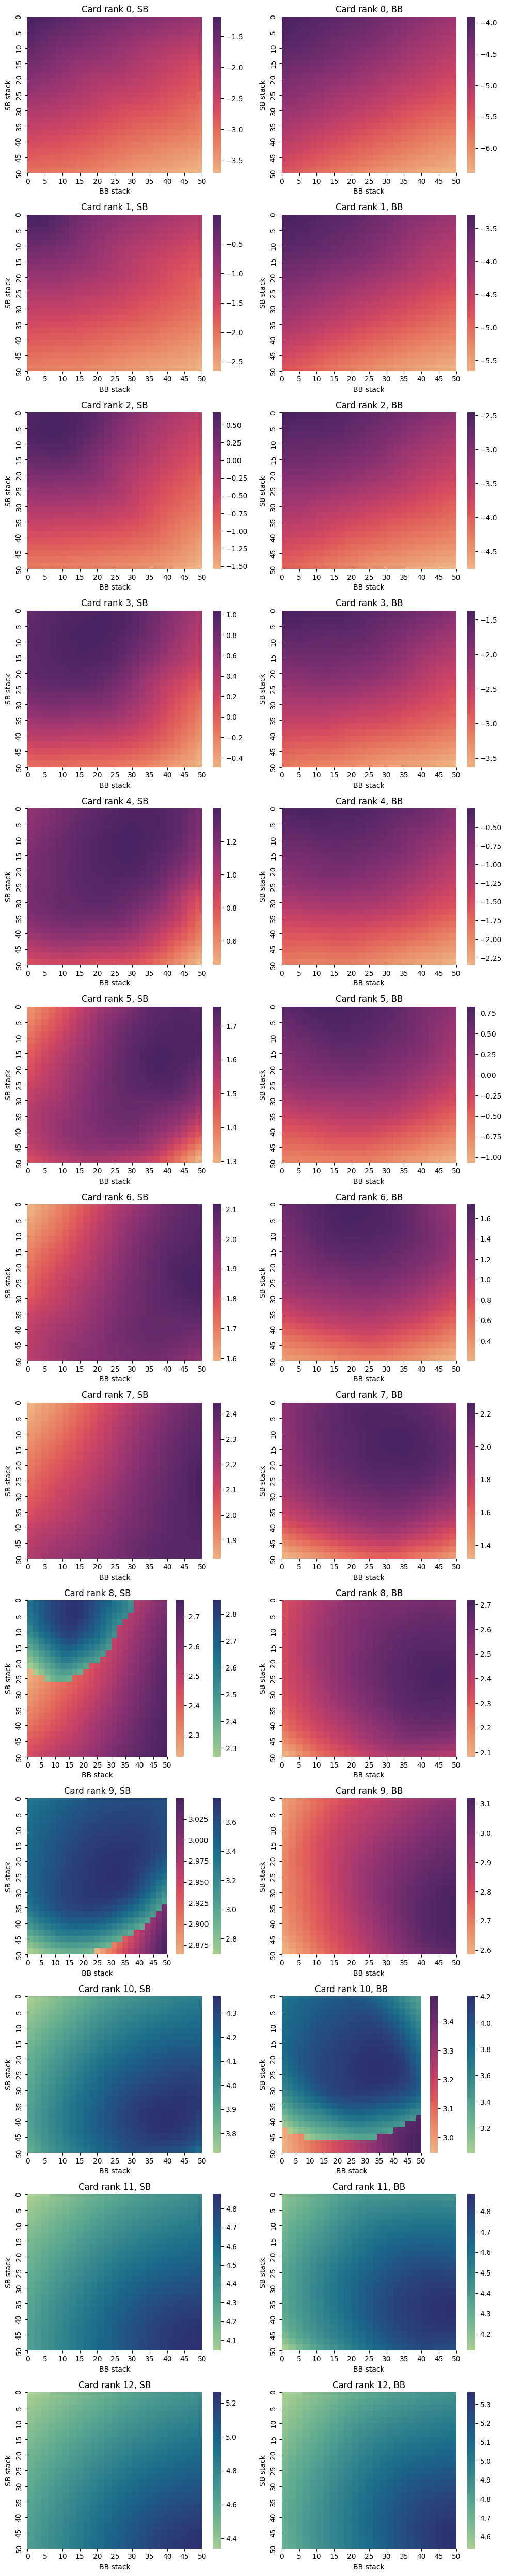

In [85]:
plot_learned_rewards(best_agent)